<a href="https://colab.research.google.com/github/Best-Verie/PCA-Formative/blob/main/Copy_of_Template_PCA_Formative_1%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

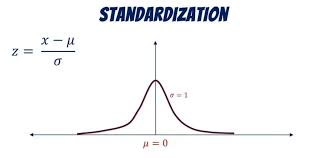


In [1]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation

# We chose to deal with the African Crises dataset from kaggle.com for this assignment.


import numpy as np
# Load the dataset

dataset_path = 'https://raw.githubusercontent.com/Best-Verie/PCA-Formative/refs/heads/main/datasets/african_crises.csv'
data = np.genfromtxt(dataset_path, delimiter=',', dtype=str, skip_header=1)

# Since our dataset contains non-numeric data, we decided  to convert some columnds (categorical columns )
# such as country, cc3, banking_crisis to a numeric format.
# Header : becomes['case','cc3','country','year','systemic_crisis','exch_usd',
# 'domestic_debt_in_default','sovereign_external_debt_default','gdp_weighted_default',
# 'inflation_annual_cpi','independence','currency_crises','inflation_crises','banking_crisis']

categorical_cols = [1, 2, 13]  # 'cc3', 'country', 'banking_crisis'

#  Encoding non-numeric (categorical) columns
def encode_column(column):
    unique_vals = np.unique(column)
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    return np.vectorize(mapping.get)(column)

# Storing processed columns
processed_columns = []

for col_index in range(data.shape[1]):

    column_data = data[:, col_index]

    if col_index in categorical_cols:
        encoded_col = encode_column(column_data)
    else:
        try:
            encoded_col = column_data.astype(float)
        except ValueError:
            print(f"Failed to convert column {col_index} to float. Sample values: {column_data[:5]}")
            continue

    processed_columns.append(encoded_col)


# Converting processed columns to a numpy array
numeric_data = np.column_stack(processed_columns)

# Removing any rows with missing values
numeric_data = numeric_data[~np.isnan(numeric_data).any(axis=1)]


# Standardizing the data using the formula (Data - Data Mean) / Data's Standard Deviation
mean = np.mean(numeric_data, axis=0)
std = np.std(numeric_data, axis=0) 
std[std == 0] = 1  # to Avoid division by zero
standardized_data = (numeric_data - mean) / std


#DIsplating The Outputttt
print("Shape of standardized data:", standardized_data.shape)
print("First 5 rows of standardized data:\n", standardized_data[:5])



Shape of standardized data: (1059, 14)
First 5 rows of standardized data:
 [[-1.46165598 -0.84432946 -1.57145157 -2.91715048  3.45175812 -0.38671252
  -0.20321893 -0.42497295 -0.14700624 -0.03086348 -1.86235185 -0.37805817
  -0.38547376 -3.20405328]
 [-1.46165598 -0.84432946 -1.57145157 -2.88731291 -0.28970744 -0.38670773
  -0.20321893 -0.42497295 -0.14700624 -0.03084763 -1.86235185 -0.37805817
  -0.38547376  0.31210467]
 [-1.46165598 -0.84432946 -1.57145157 -2.85747534 -0.28970744 -0.38671243
  -0.20321893 -0.42497295 -0.14700624 -0.03087408 -1.86235185 -0.37805817
  -0.38547376  0.31210467]
 [-1.46165598 -0.84432946 -1.57145157 -2.82763778 -0.28970744 -0.38671776
  -0.20321893 -0.42497295 -0.14700624 -0.03085199 -1.86235185 -0.37805817
  -0.38547376  0.31210467]
 [-1.46165598 -0.84432946 -1.57145157 -2.79780021 -0.28970744 -0.3867211
  -0.20321893 -0.42497295 -0.14700624 -0.03087427 -1.86235185 -0.37805817
  -0.38547376  0.31210467]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
print("Shape of the covariance matrix:", cov_matrix.shape)
print("First 5 rows of covariance matrix:\n", cov_matrix[:5, :5])


Shape of the covariance matrix: (14, 14)
First 5 rows of covariance matrix:
 [[ 1.00094518  0.96501601  0.99148965  0.11568362  0.01100119]
 [ 0.96501601  1.00094518  0.94704139  0.05172741 -0.01270385]
 [ 0.99148965  0.94704139  1.00094518  0.13511806  0.01560091]
 [ 0.11568362  0.05172741  0.13511806  1.00094518  0.19763708]
 [ 0.01100119 -0.01270385  0.01560091  0.19763708  1.00094518]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors

(array([0.00660777, 0.04730237, 0.13236399, 0.25957884, 0.50779135,
        0.58290089, 0.77370212, 0.9301233 , 1.00655237, 1.13223355,
        1.34142976, 1.40362628, 2.78761414, 3.10140578]),
 array([[ 0.76685433,  0.26450963, -0.01518186, -0.00909217,  0.06197015,
          0.01310169,  0.09019936, -0.0651823 ,  0.00281401, -0.05219647,
         -0.04951262,  0.09799053,  0.06587195, -0.55329393],
        [-0.14972595, -0.80696191,  0.00874982, -0.03393455,  0.07291308,
          0.00177997,  0.02506779, -0.01846829, -0.01326644, -0.07956682,
         -0.03828147,  0.05245917,  0.09278662, -0.54730602],
        [-0.62346809,  0.51632678, -0.04022459,  0.00914223,  0.04648502,
          0.02348555,  0.09849263, -0.09756958,  0.02887585, -0.04773399,
         -0.03775336,  0.10434885,  0.04908102, -0.55065802],
        [ 0.00246494, -0.04685441,  0.02815715, -0.03218744, -0.6901425 ,
          0.20143818,  0.16589336,  0.1289889 , -0.11281964,  0.43738518,
          0.03426015,  0.356

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print sorted eigenvalues (explained variance)
print("Sorted Eigenvalues (Explained Variance):")
print(eigenvalues)

# Print top 5 principal components (eigenvectors)
print("\nTop 5 Principal Components (Eigenvectors):")
for i in range(5):
    print(f"Component {i+1}:")
    print(eigenvectors[:, i])


Sorted Eigenvalues (Explained Variance):
[3.10140578 2.78761414 1.40362628 1.34142976 1.13223355 1.00655237
 0.9301233  0.77370212 0.58290089 0.50779135 0.25957884 0.13236399
 0.04730237 0.00660777]

Top 5 Principal Components (Eigenvectors):
Component 1:
[-0.55329393 -0.54730602 -0.55065802 -0.09788759 -0.03405423  0.17910991
 -0.14904988 -0.0059824   0.01863852 -0.06159231 -0.03793968 -0.12449888
 -0.06454596  0.02788234]
Component 2:
[ 0.06587195  0.09278662  0.04908102 -0.30468096 -0.41972707 -0.2607606
 -0.28522166 -0.41715899 -0.08657608 -0.11292615 -0.24457532 -0.23489172
 -0.24056025  0.44627794]
Component 3:
[ 0.09799053  0.05245917  0.10434885  0.35681464 -0.09155475  0.39892791
 -0.15189878  0.16942848  0.08404788 -0.19009368  0.41919513 -0.3587264
 -0.51017478  0.14915893]
Component 4:
[-0.04951262 -0.03828147 -0.03775336  0.03426015 -0.52535197 -0.0290282
  0.30655807  0.38973151  0.37697584  0.01346377  0.08742113  0.2766728
  0.18133635  0.45979659]
Component 5:
[-0.0521

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [7]:
# Step 6: Project Data onto Principal Components
# Select number of components based on 95% covarience
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

num_components = np.searchsorted(cumulative_variance, 0.95) + 1
print(f"Number of components selected: {num_components}")

#Select top n_components eigenvectors
principal_components = eigenvectors[:, :num_components]

# Project data
reduced_data = standardized_data @ principal_components


Number of components selected: 10


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [8]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1059, 10)


array([[ 2.32016842, -1.25233413, -2.83662368, -3.83236179, -2.78887157,
         0.09479544, -0.61257304, -0.86031154, -1.10486278,  0.38658368],
       [ 2.54269901,  1.87814998, -1.95896299, -0.24903575, -1.37739266,
         0.73530464, -0.74457583, -0.37140568, -0.6595629 ,  0.57238722],
       [ 2.53977907,  1.86906326, -1.94831335, -0.24801373, -1.36434176,
         0.73191903, -0.74074166, -0.36646582, -0.6535526 ,  0.55179288],
       [ 2.53685603,  1.85997121, -1.9376732 , -0.24699104, -1.35129184,
         0.72856661, -0.73687705, -0.36151196, -0.64754168,  0.53119954],
       [ 2.53393607,  1.85088366, -1.92702381, -0.24596901, -1.33824098,
         0.7251842 , -0.73304084, -0.35657023, -0.64153138,  0.51060575]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

Matplotlib is building the font cache; this may take a moment.


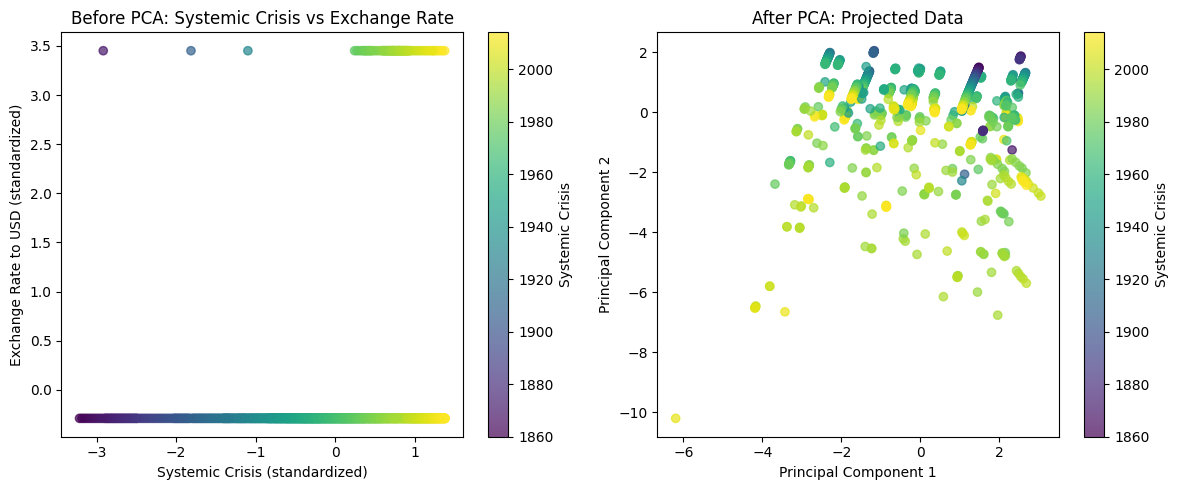

In [10]:
# Step 8: Visualize Before and After PCA

import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot original data (first two non-categorical features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 3], standardized_data[:, 4],
            c=numeric_data[:, 3], cmap='viridis', alpha=0.7)
plt.title('Before PCA: Systemic Crisis vs Exchange Rate')
plt.xlabel('Systemic Crisis (standardized)')
plt.ylabel('Exchange Rate to USD (standardized)')
plt.colorbar(label='Systemic Crisis')

# Project data onto top 2 principal components
projected_data = standardized_data @ eigenvectors[:, :2]

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(projected_data[:, 0], projected_data[:, 1],
            c=numeric_data[:, 3], cmap='viridis', alpha=0.7)
plt.title('After PCA: Projected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Systemic Crisis')

plt.tight_layout()
plt.show()